In [ ]:
"""
Amoeba Population Simulation

This script simulates the evolution of an amoeba population over time, 
based on probabilistic reproduction and extinction rules.

Inspired by an online problem, apparently asked at JP Morgan.
"""

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:

# Function to simulate one run of the amoeba population evolution
#Track only the final population after each run instead of history to save memory!
# set population cap after which extinction probability is infinitesimaly low -> Saves processing time!

def simulate_amoeba(p_die, p_stay, p_double, p_triple, max_steps=100, population_cap=25):
    population = 1  # Start with 1 amoeba
    for step in range(max_steps):
        if population == 0:
            return step  # Return the extinction time
        
        if population > population_cap:
            return max_steps  # Stop simulation if population exceeds population_cap
        
        new_population = 0  # Track population number of amoeba for each next generation 
        for _ in range(population):
            rand = random.random()  #random probability generator->[0,1]
            if rand < p_die:
                continue  # The amoeba dies
            elif rand < p_die + p_stay:
                new_population += 1  #amoeba stays the same
            elif rand < p_die + p_stay + p_double:
                new_population += 2  #amoeba doubles
            else:
                new_population += 3  #amoeba triples

        population = new_population  

    return max_steps  # population doesn't die out

# Function to run multiple independent simulations  
# calculate the extinction probability and track extinction rates as function of time 
def simulate_multiple_runs(num_simulations, p_die, p_stay, p_double, p_triple, max_steps=100):
    extinction_count = 0  #frequency of extinctions
    extinction_times = []  #track extinction times 
    for _ in range(num_simulations):
        extinction_time = simulate_amoeba(p_die, p_stay, p_double, p_triple, max_steps)
        if extinction_time < max_steps:  # extinction before max_steps
            extinction_count += 1
            extinction_times.append(extinction_time)
        else:
            continue
    return extinction_count / num_simulations, extinction_times  #return extinction probability and rate of extinctions



In [3]:
#probabilities for the amoeba's behavior 
p_die = 0.25
p_stay = 0.25
p_double = 0.25
p_triple = 0.25

# Run the simulation for 1 million independent trials
num_simulations = 1000000
extinction_probability, extinction_times = simulate_multiple_runs(num_simulations, p_die, p_stay, p_double, p_triple)

print(f"Simulational Inference: Probability of extinction= {extinction_probability:.4f}")


Simulational Inference: Probability of extinction= 0.4139


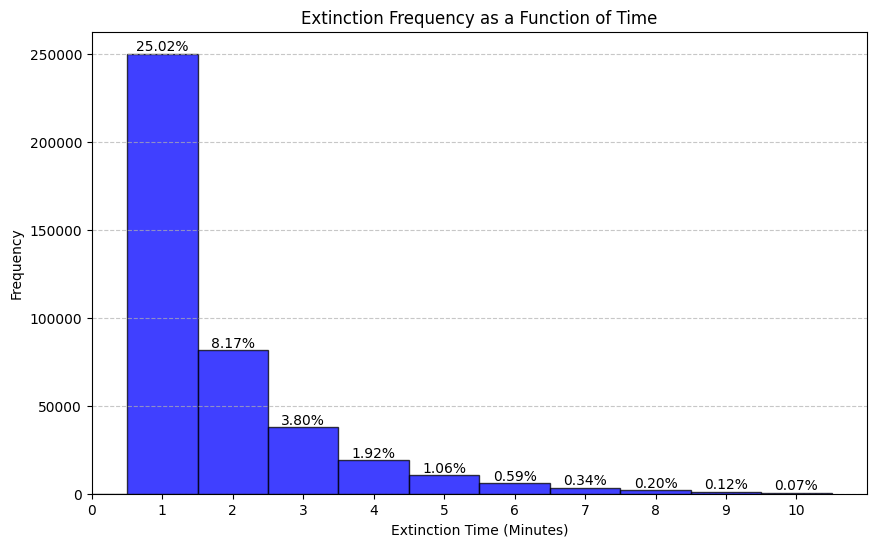

In [4]:
#Visualize extinction rates as function of time upto 10 time steps

filtered_extinction_times = [t for t in extinction_times if t <= 10]

bins = list(range(0, 12))  

plt.figure(figsize=(10, 6))

n, bins, patches = plt.hist(filtered_extinction_times, bins=bins, alpha=0.75, color='blue', edgecolor='black', align='left')

#indicate percentage of traials ending in Extinction for each time step
for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        fraction = height * 100 / num_simulations  # Convert fractions to percentages
        plt.text(bins[i], height + 0.5, f'{fraction:.2f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Extinction Time (Minutes)')
plt.ylabel('Frequency')
plt.title('Extinction Frequency as a Function of Time')
plt.xticks(range(0, 11))  
plt.xlim(0, 11)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.savefig("extinctions_over_time.png", dpi=300, bbox_inches='tight')  
plt.show()

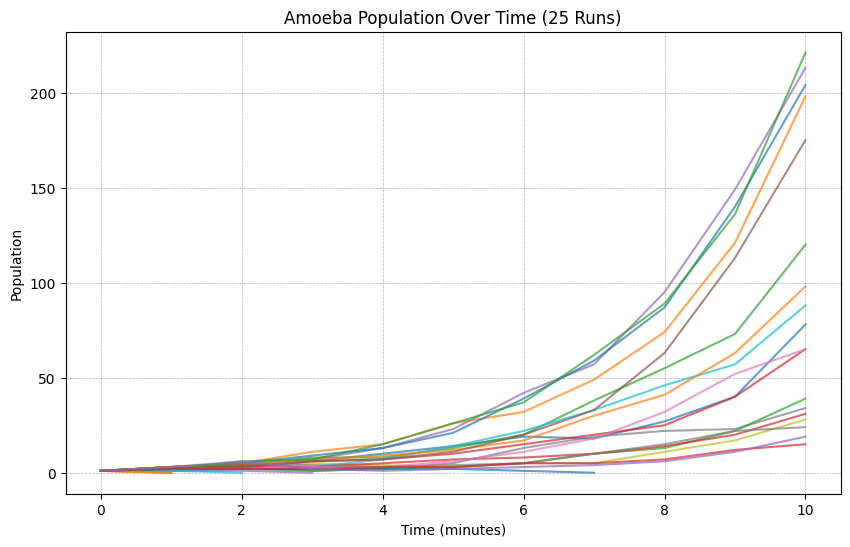

In [ ]:
# Function to simulate AND track population history for each simulated trial
def simulate_amoeba(p_die, p_stay, p_double, p_triple, max_steps=10):
    population = 1  # Start with 1 amoeba
    population_history = [population]  # List to store population over time

    for step in range(max_steps):
        if population == 0:
            return population_history  # Return the history if population dies out

        new_population = 0  # Track new amoebas being born
        for _ in range(population):
            rand = random.random()  # Generate a random number between 0 and 1
            if rand < p_die:
                continue  # The amoeba dies
            elif rand < p_die + p_stay:
                new_population += 1  # The amoeba stays the same
            elif rand < p_die + p_stay + p_double:
                new_population += 2  # The amoeba doubles
            else:
                new_population += 3  # The amoeba triples

        population = new_population  # Update the population
        population_history.append(population)  # Append current population to history

    return population_history  # Return the population history if it doesn't die out

# Function to run multiple simulations and plot the population over time for 10 runs
def simulate_and_plot_multiple_runs(num_simulations, p_die, p_stay, p_double, p_triple, max_steps=10):
    plt.figure(figsize=(10, 6))

    # Run simulations and plot population over time for 10 random runs
    for _ in range(num_simulations):
        population_history = simulate_amoeba(p_die, p_stay, p_double, p_triple, max_steps)
        plt.plot(population_history, alpha=0.7)  # Plot the population history for each run

    # Customize plot
    plt.xlabel('Time (minutes)')
    plt.ylabel('Population')
    plt.title(f'Amoeba Population Over Time ({num_simulations} Runs)')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5) 
    plt.savefig("population_evolution.png", dpi=300, bbox_inches='tight') 
    plt.show()

# Run the simulation for 10 sample runs
num_simulations = 25
simulate_and_plot_multiple_runs(num_simulations, p_die, p_stay, p_double, p_triple)



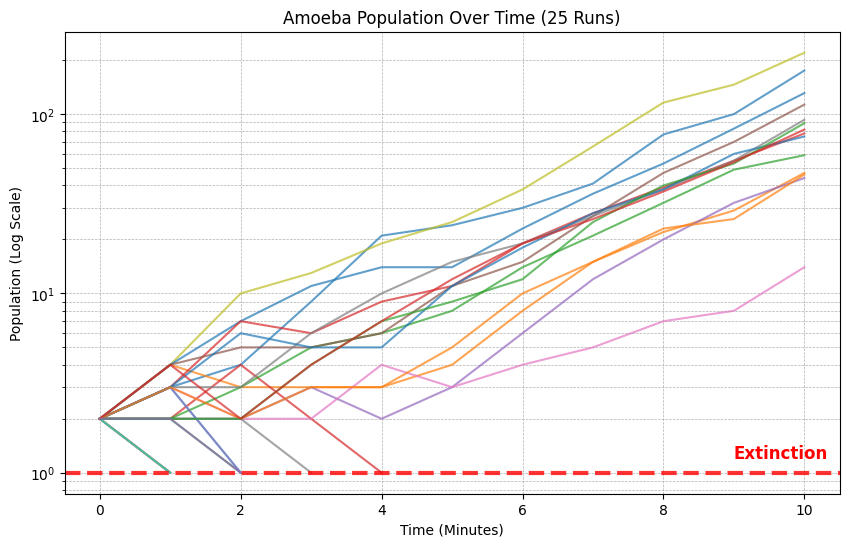

In [6]:
#plot the population on log scale over time for better visualization

#Visual trick : Increment final population by 1 to avoid 0 on log scale. So extinction=> Final population=1

def simulate_and_logplot_multiple_runs(num_simulations, p_die, p_stay, p_double, p_triple, max_steps=10):
    plt.figure(figsize=(10, 6))

    # Run simulations and plot population over time
    for _ in range(num_simulations):
        population_history = simulate_amoeba(p_die, p_stay, p_double, p_triple, max_steps)
        
        # Ensure time steps are correct
        time_steps = list(range(len(population_history)))  # Create corresponding time axis
        
        # Add 1 to each value to avoid log(0) issues
        population_history = [pop + 1 for pop in population_history]
        
        plt.plot(time_steps, population_history, alpha=0.7)  # Plot each simulation

    # Add Extinction threshold by a line
    plt.axhline(y=1, color='red', linewidth=3, linestyle='--', alpha=0.8)  
    plt.text(max_steps * 0.9, 1.2, "Extinction", color='red', fontsize=12, fontweight='bold')

    plt.xlabel('Time (Minutes)')
    plt.ylabel('Population (Log Scale)')
    plt.title(f'Amoeba Population Over Time ({num_simulations} Runs)')
    plt.yscale('log')  
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)  

    plt.savefig("population_evolution_log.png", dpi=300, bbox_inches='tight') 
    plt.show()

# Run the simulation for n sample runs
num_simulations = 25
simulate_and_logplot_multiple_runs(num_simulations, p_die, p_stay, p_double, p_triple)
